## Guide Project: Visualizing Earnings Based On College Majors##

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

* Rank - Rank by median earnings (the dataset is ordered by this column).
* Major_code - Major code.
* Major - Major description.
* Major_category - Category of major.
* Total - Total number of people with major.
* Sample_size - Sample size (unweighted) of full-time.
* Men - Male graduates.
* Women - Female graduates.
* ShareWomen - Women as share of total.
* Employed - Number employed.
* Median - Median salary of full-time, year-round workers.
* Low_wage_jobs - Number in low-wage service jobs.
* Full_time - Number employed 35 hours or more.
* Part_time - Number employed less than 35 hours.
* Using visualizations, we can start to explore questions from the dataset like:

Do students in more popular majors make more money?
Using scatter plots
How many majors are predominantly male? Predominantly female?
Using histograms
Which category of majors have the most students?
Using bar plots

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [43]:
import matplotlib as plt
import pandas as pd
%matplotlib inline

In [44]:
#read the dataset into pandas

recent_grads = pd.read_csv('recent-grads.csv')

recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [45]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [46]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [47]:
# get summary statistics for numeric column

recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


**Drop rows with missing values. **

Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors.

In [48]:
raw_data_count = recent_grads.shape
print(raw_data_count)


(173, 21)


In [49]:
#Let's drop all rows containing missing values

recent_grads = recent_grads.dropna()

cleaned_data_count = recent_grads.shape
print(cleaned_data_count)

(172, 21)


**Lets's generate scatter plots to explore the following relations:**

* Sample_size and Median
* Sample_size and Unemployment_rate
* Full_time and Median
* ShareWomen and Unemployment_rate
* Men and Median
* Women and Median

We want to be able to answer the following questions:

* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

**Sample_size and Median**


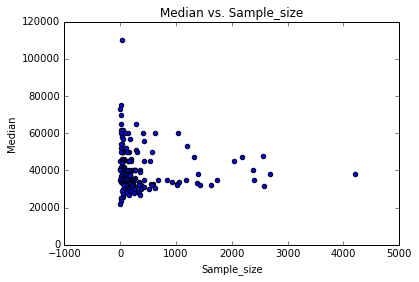

In [50]:
recent_grads.plot(x='Sample_size', y='Median', kind='scatter', 
                  title='Median vs. Sample_size')

We can notice a strong correlation between the sample size and median salary. Less popular major (sample size between 0 and 400) seem to pay higher salaries, ranging from 25000 to 80000 approximately. As the sample size increases, the range of salaries drop to 25000 - 60000 and continues descreasing.

**Sample_size and Unemployment_rate**

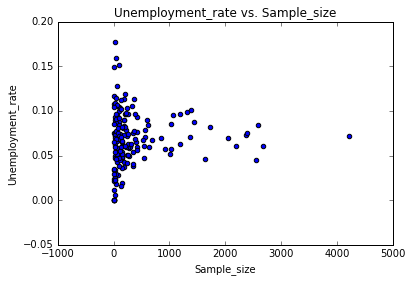

In [51]:
recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter', 
                  title='Unemployment_rate vs. Sample_size')


Similar behavoir as the previous graph. Higher unemployment rates (0.05 and 0.12) are more common in smaller sample sizes (0 to 500)

**Full_time and Median**

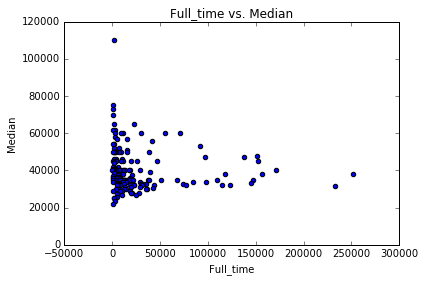

In [52]:
recent_grads.plot(x='Full_time', y='Median', kind='scatter', 
                  title='Full_time vs. Median')

**SharedWomen and Unemployment_rate**

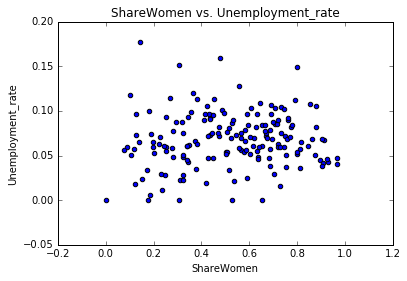

In [53]:
recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter', 
                  title='ShareWomen vs. Unemployment_rate')

No correlation between the ShareWomen and Unemployment rates.

**Men and Mean**

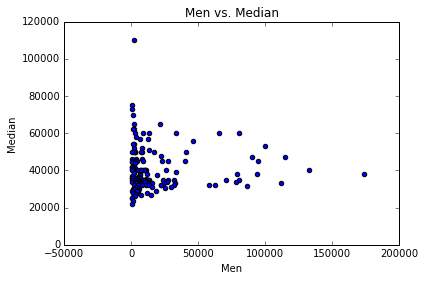

In [54]:
recent_grads.plot(x='Men', y='Median', kind='scatter', 
                  title='Men vs. Median')

There is not a lot of variance in salary for Men up to 100000, the salary range is steady 25000 - 60000 approximately.

**Women and Median**

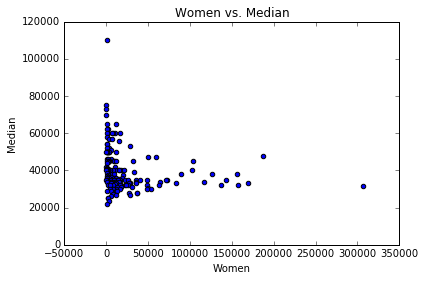

In [55]:
recent_grads.plot(x='Women', y='Median', kind='scatter', 
                  title='Women vs. Median')

The majors with a low proportion of women have an income range from around 20000 up to 70000. The income range gradually drops  as the number of women increases. 


**Answering the questions:**

**Do students in more popular majors make more money?**
The answer is no. We can notice a strong correlation between the sample size and median salary. Less popular major (sample size between 0 and 400) seem to pay higher salaries, ranging from $30000 to $70000 approximately. 


**Do students that majored in subjects that were majority female make more money?**

The graph Women x Median shows they do not. Students majored in subjects with a higher number of women should expect lower salaries.


**Is there any link between the number of full-time employees and median salary?**

The smaller the number os full time employees the higher is the salary

the strongest correlation between full time employees and median salaries is within the following ranges:
2000 employees or less have higher salaries, ranging from approximately $25000 - $45000.


**Let's now create Histograms to visualize the distributions of the following columns:**
* Sample_size
* Median
* Employed
* Full_time
* ShareWomen
* Unemployment_rate
* Men
* Women

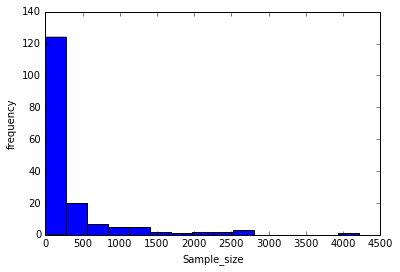

In [56]:
# Sample_size

ax = recent_grads['Sample_size'].plot(bins = 15, 
                                 kind='hist', 
                                )
ax.set_xlabel('Sample_size')
ax.set_ylabel('frequency')


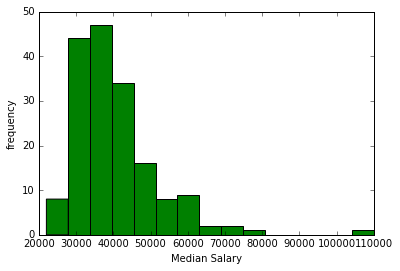

In [57]:
#  Median
ax = recent_grads['Median'].plot(bins = 15, 
                                 kind='hist',
                                 color='green'
                                )
ax.set_xlabel('Median Salary')
ax.set_ylabel('frequency')

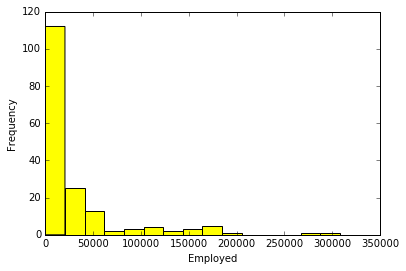

In [58]:
# Employed - Let's use the series.hist() for this one.

ax = recent_grads['Employed'].plot(bins = 15,
                              kind='hist',
                              color='yellow')
                            
ax.set_xlabel('Employed')


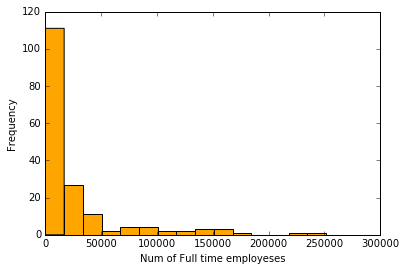

In [59]:
#Full_time


ax = recent_grads['Full_time'].plot(bins = 15,
                              kind='hist',
                              color='orange')
                            
ax.set_xlabel('Num of Full time employeses')

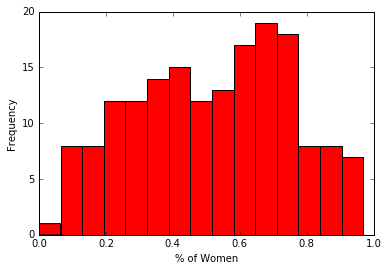

In [60]:
# ShareWomen

ax = recent_grads['ShareWomen'].plot(bins = 15,
                              kind='hist',
                              color='red')
                            
ax.set_xlabel('% of Women')

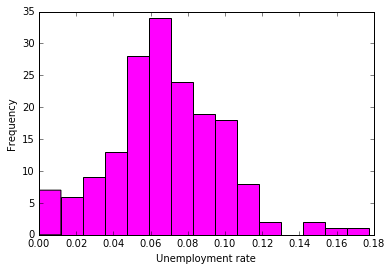

In [61]:
# Unemployment_rate

ax = recent_grads['Unemployment_rate'].plot(bins = 15,
                              kind='hist',
                              color='magenta')
                            
ax.set_xlabel('Unemployment rate')

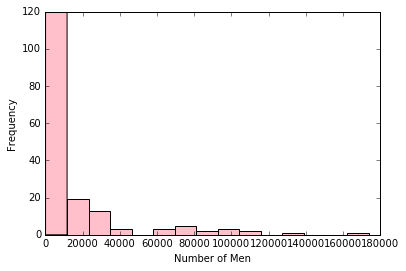

In [62]:
# Men


ax = recent_grads['Men'].plot(bins = 15,
                              kind='hist',
                              color='pink')
                            
ax.set_xlabel('Number of Men')

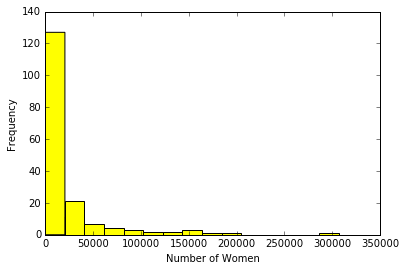

In [63]:
# Women

recent_grads['Women'].hist(bins=15, range=(100,120000))


ax = recent_grads['Women'].plot(bins = 15,
                              kind='hist',
                              color='yellow')
                            
ax.set_xlabel('Number of Women')

We will now generate a **scatter matrix plot** to combine both scatter plots and histograms into one grid of plots. This will allow us to explore potential relationships and distributions simultaneously. 

The scatter_matric function is part of the pandas.plotting module and needs to be imported separately.

In [64]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c339f9cc0>,
      dtype=object)

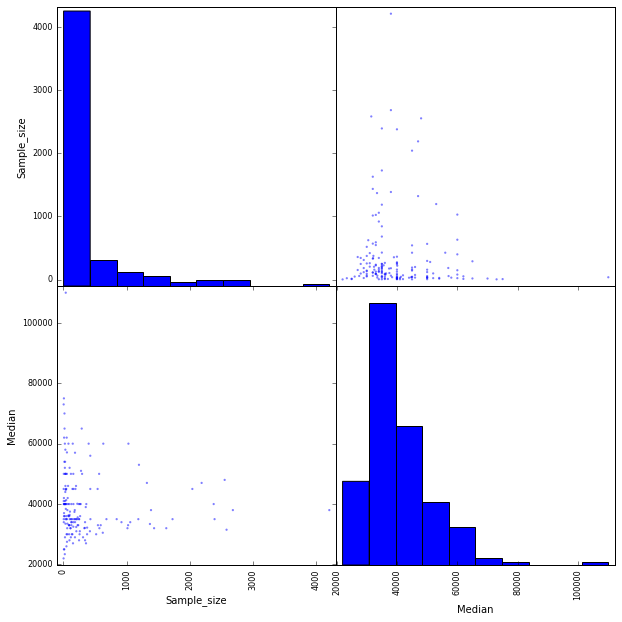

In [65]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c337d2940>,
      dtype=object)

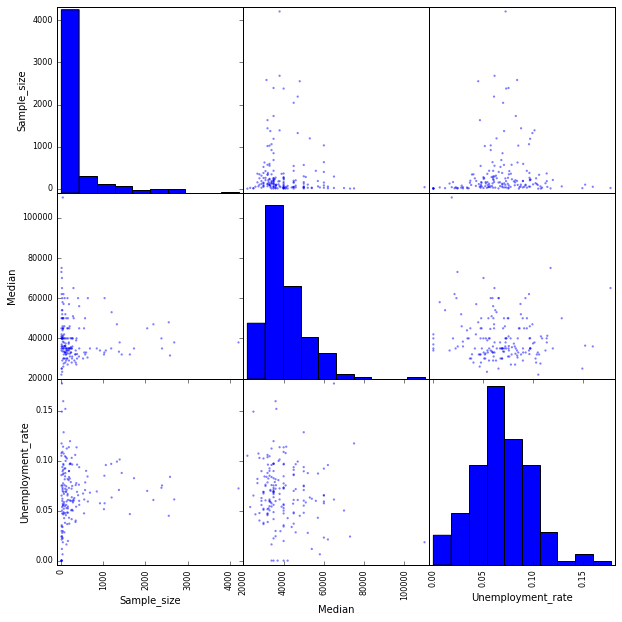

In [66]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate' ]],
               figsize=(10,10))


Let's explore the questions from the last few steps using these scatter matrix plots.

**Do students in more popular majors make more money?**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c334b0588>,
      dtype=object)

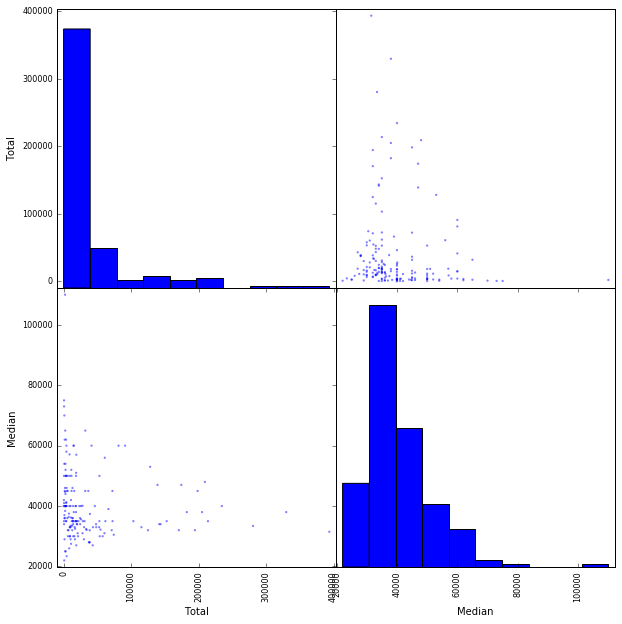

In [67]:
#  relationship and distribution of Total and Median
scatter_matrix(recent_grads[['Total', 'Median']], figsize=(10,10))

The plots above confirm that the popular Major courses expect to have lower maximum Median income than less popular Major subjects.

**Do students that majored in subjects that were majority female make more money?**


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c332da208>,
      dtype=object)

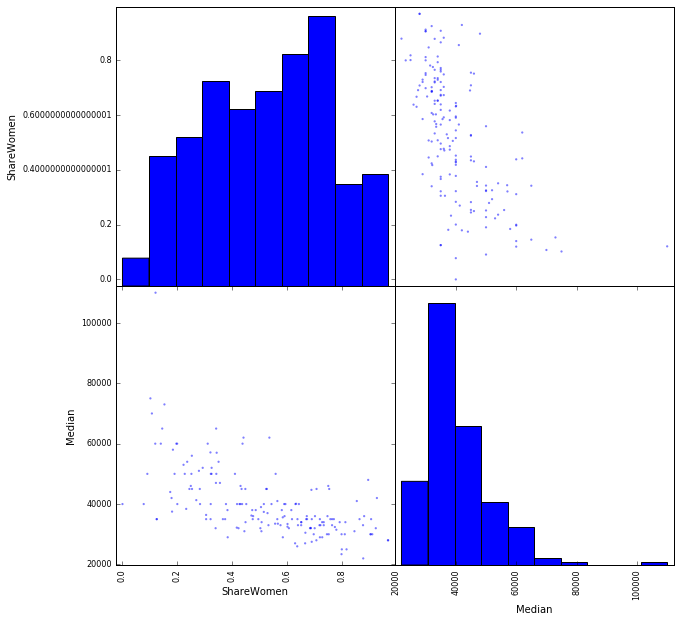

In [68]:
scatter_matrix(recent_grads[['ShareWomen', 'Median']], 
               figsize = (10,10))

The scatter matrix comparing 'Women x Median' confirms what we had concluded previously, as the proportion of women increases, there is a gradual drop in the salary.

**Is there any link between the number of full-time employees and median salary?
**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6c33208e48>,
      dtype=object)

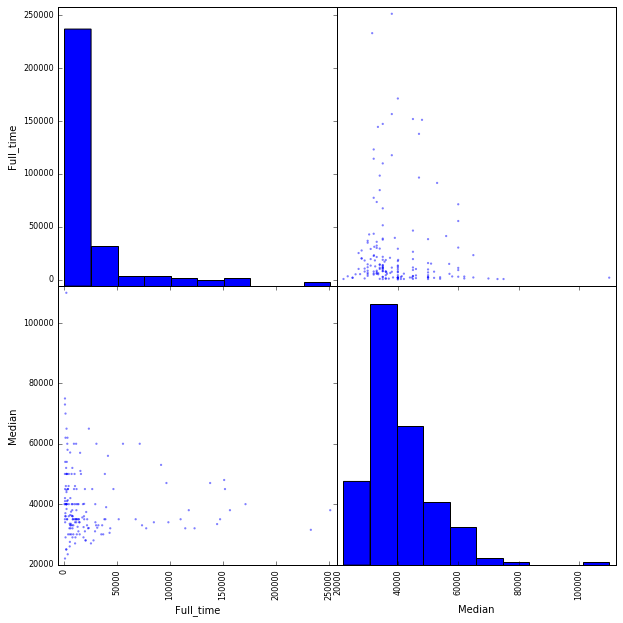

In [69]:
scatter_matrix(recent_grads[['Full_time', 'Median']], 
               figsize = (10,10))

As the number of full time employees increase, there is a clear decline in the median salary

**Let's compare the percentages of women (ShareWomen) in the top 10 and also in the bottom 10 Majors.**


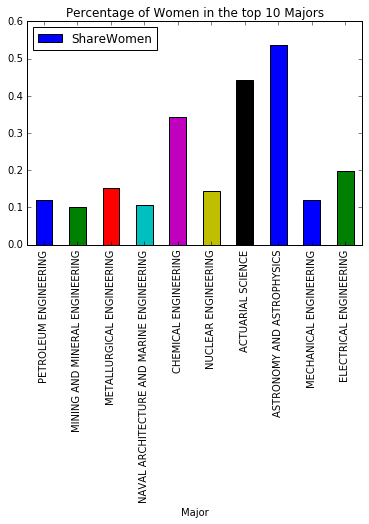

In [70]:
# Top 10 Major
recent_grads.head(10).plot.bar(x='Major', y='ShareWomen',
                               title='Percentage of Women in the top 10 Majors')


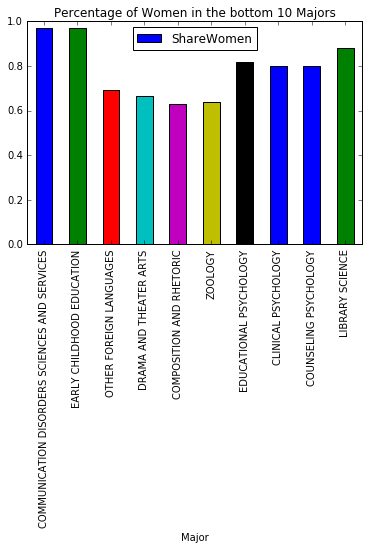

In [71]:
# Bottom 10 Major
recent_grads.tail(10).plot.bar(x='Major', 
                               y='ShareWomen',
                               title='Percentage of Women in the bottom 10 Majors')


**Observations:**

The females' percentage is lower in the first ten major subjects.

Astronomy and Astrophysics (50%), Actuarial Science (45%), and Chemical Engineering (35%) are majors with the highest percentage of females among the top ten subjects. For the other 7 majors, women's presence is less than 20%

The female presence in the bottom 10 majors is notably higher. Approximately 80% of the students are women.

Communication Disorders Sciences and Early Childhood Educationhave the highest rate of females who graduated in the bottom 10 with low median salary.

**Let's now compare the Unemployment rate in the top 10 and also in the bottom 10 Majors.**


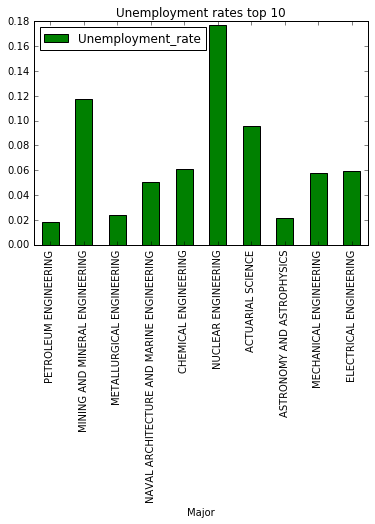

In [72]:
# Top 10 
recent_grads.head(10).plot.bar(x='Major', y='Unemployment_rate',
                               title='Unemployment rates top 10',
                              color = 'green')


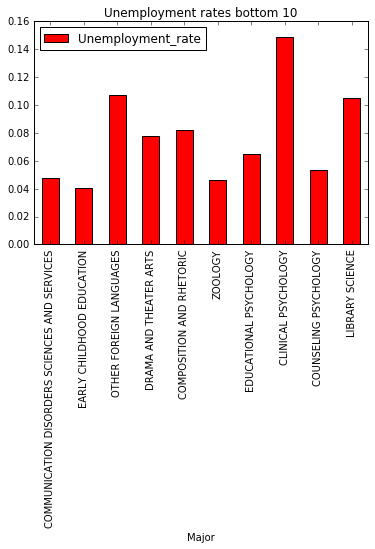

In [73]:
# Bottom 10 
recent_grads.tail(10).plot.bar(x='Major', y='Unemployment_rate',
                               title='Unemployment rates bottom 10',
                              color='red')


**Observations:**

The Unemployment rates are approximately similar in two groups with slightly lower in the first ten major subjects.
Astronomy and Astrophysics, Metallurgical engineering, and Petroleum Engineering are major topics with the lowest unemployment rate (less than 3%) among the top 10 majors.

The highest Unemployment rates in the bottom 10 groups are:
Clinical Psychology (15%), Library Science and Other Foreign Languages rates are around 11%.

## Addtitional Exploration##

**Let's use a grouped bar plot to compare the number of men with the number of women in each category of majors.**


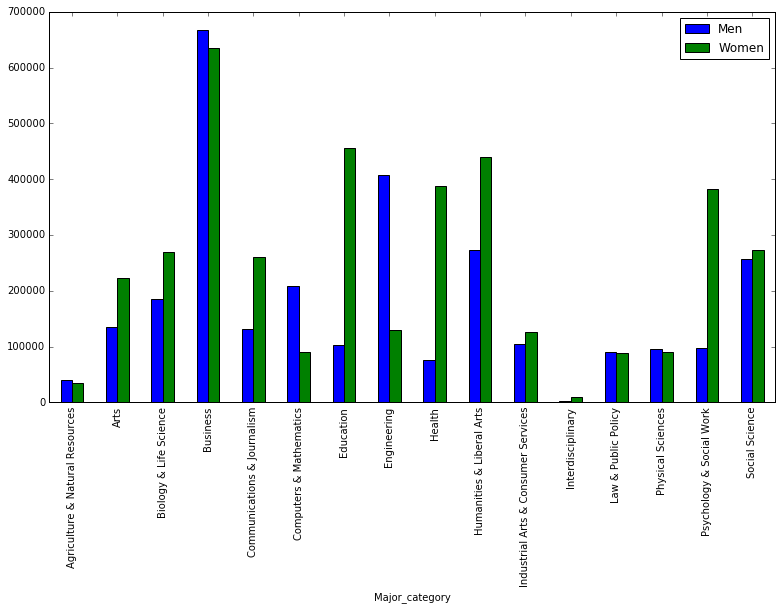

In [74]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(13, 7))


Observations:

* The most popular category is Business, where the proportion men/women is close to equal.
* The least popular category is Interdiciplinary.
* Law & Public Policy, Physical Sciences and Industrial Arts & Consumer Services have a similar proportion of men and women.
* Big disparity in the categories Education, Health, and Psychology & Social Work. Women are the absolute majority here.
* The Engineering category is male dominated.


** Let's use a box plot to explore the distributions of median salaries and unemployment rate.**


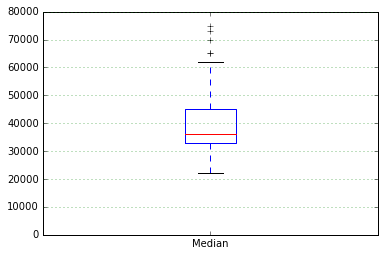

In [88]:
#Median 
recent_grads['Median'].plot(kind='box', ylim=(0,80000)).grid(color='green', axis='y')



**Observations:**
* Half of the majors have a salary between 35k and 60k
* The lowest median wage for the major courses is around 22k.
* There are a few of outliers with salaries above 60k

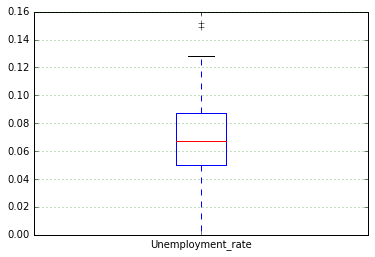

In [86]:
#Unemployment rate

recent_grads['Unemployment_rate'].plot(kind='box', ylim=(0,0.16)).grid(color='green', axis='y')


**Observations:**
* 75% of the majors have unemployment rate below 9 percent.
* About 50%  majors have the unemployment rate ranging from 5% - 9%.
* A few outliers with unemployment rate higher than 12%.


## Conclusion ##

Let's summarize some of the observations made throughout this project

* Major programs that are more popular pay less than the non-popular ones. It might be so due to the offer of graduates being abundant, which may lead employers  lower salaries.
* Men have higher salaries compared to women. Although the income inequality between Men and Women is not something new to anybody, this study reiterates that.
* Fields like Engineering are still male dominant.
* In fields related to human sciences such as Education, Health, etc, the proportion of women is higher compared to men.
* The overall average unemployment rate is around 7%.